In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
print(pd.__version__)

2.2.2


**Step 1 : Data Exploration & Leading:**

## Data loading

Load the "Walmart.csv" file from your local machine into a Colab notebook environment as a pandas DataFrame.


In [2]:
from google.colab import files
import io

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  try:
    df = pd.read_csv(io.BytesIO(uploaded[fn]))
    print(df.shape)
    break # Assuming only one file is uploaded
  except Exception as e:
    print(f"An error occurred while reading '{fn}': {e}")

Saving Walmart.csv to Walmart (2).csv
User uploaded file "Walmart (2).csv" with length 844444 bytes
(10051, 11)


In [3]:
df = pd.read_csv('Walmart.csv', encoding_errors='ignore')

df.shape

(10051, 11)

In [4]:
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin
0,1,WALM003,San Antonio,Health and beauty,$74.69,7.0,5/1/19,13:08:00,Ewallet,9.1,0.48
1,2,WALM048,Harlingen,Electronic accessories,$15.28,5.0,8/3/19,10:29:00,Cash,9.6,0.48
2,3,WALM067,Haltom City,Home and lifestyle,$46.33,7.0,3/3/19,13:23:00,Credit card,7.4,0.33
3,4,WALM064,Bedford,Health and beauty,$58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33
4,5,WALM013,Irving,Sports and travel,$86.31,7.0,8/2/19,10:37:00,Ewallet,5.3,0.48


In [5]:
df.describe()

,invoice_id,quantity,rating,profit_margin
count,10051.000000,10020.000000,10051.000000,10051.000000
mean,5025.741220,2.353493,5.825659,0.393791
std,2901.174372,1.602658,1.763991,0.090669
min,1.000000,1.000000,3.000000,0.180000
25%,2513.500000,1.000000,4.000000,0.330000
50%,5026.000000,2.000000,6.000000,0.330000
75%,7538.500000,3.000000,7.000000,0.480000
max,10000.000000,10.000000,10.000000,0.570000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      10051 non-null  int64  
 1   Branch          10051 non-null  object 
 2   City            10051 non-null  object 
 3   category        10051 non-null  object 
 4   unit_price      10020 non-null  object 
 5   quantity        10020 non-null  float64
 6   date            10051 non-null  object 
 7   time            10051 non-null  object 
 8   payment_method  10051 non-null  object 
 9   rating          10051 non-null  float64
 10  profit_margin   10051 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 863.9+ KB


In [7]:
df.duplicated().sum()

np.int64(51)

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [9]:
#droppping all rows with missing records
df.dropna(inplace=True)

# verify
df.isnull().sum()

,0
invoice_id,0
Branch,0
City,0
category,0
unit_price,0
quantity,0
date,0
time,0
payment_method,0
rating,0


In [10]:
df.shape

(9969, 11)

In [11]:
df.dtypes

,0
invoice_id,int64
Branch,object
City,object
category,object
unit_price,object
quantity,float64
date,object
time,object
payment_method,object
rating,float64


In [15]:
df['unit_price'] = df['unit_price'].str.replace('[\$,]', '', regex=True).str.strip()

In [16]:
df['unit_price'] = df['unit_price'].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9969 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_id      9969 non-null   int64  
 1   Branch          9969 non-null   object 
 2   City            9969 non-null   object 
 3   category        9969 non-null   object 
 4   unit_price      9969 non-null   float64
 5   quantity        9969 non-null   float64
 6   date            9969 non-null   object 
 7   time            9969 non-null   object 
 8   payment_method  9969 non-null   object 
 9   rating          9969 non-null   float64
 10  profit_margin   9969 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 934.6+ KB


In [18]:
df.columns

Index(['invoice_id', 'Branch', 'City', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin'],
      dtype='object')

In [19]:
df['total'] = df['unit_price'] * df['quantity']
df.head()

,invoice_id,Branch,City,category,unit_price,quantity,date,time,payment_method,rating,profit_margin,total
0,1,WALM003,San Antonio,Health and beauty,74.69,7.0,5/1/19,13:08:00,Ewallet,9.1,0.48,522.83
1,2,WALM048,Harlingen,Electronic accessories,15.28,5.0,8/3/19,10:29:00,Cash,9.6,0.48,76.40
2,3,WALM067,Haltom City,Home and lifestyle,46.33,7.0,3/3/19,13:23:00,Credit card,7.4,0.33,324.31
3,4,WALM064,Bedford,Health and beauty,58.22,8.0,27/01/19,20:33:00,Ewallet,8.4,0.33,465.76
4,5,WALM013,Irving,Sports and travel,86.31,7.0,8/2/19,10:37:00,Ewallet,5.3,0.48,604.17


Fixing the column name to lower case:

In [20]:
df.columns = df.columns.str.lower()
df.columns

Index(['invoice_id', 'branch', 'city', 'category', 'unit_price', 'quantity',
       'date', 'time', 'payment_method', 'rating', 'profit_margin', 'total'],
      dtype='object')

**Univariate Analysis:**

In [23]:
product_sales = df.groupby('category')['total'].sum()
print(product_sales)

category
Electronic accessories     78175.03
Fashion accessories       489480.90
Food and beverages         53471.28
Health and beauty          46851.18
Home and lifestyle        489250.06
Sports and travel          52497.93
Name: total, dtype: float64


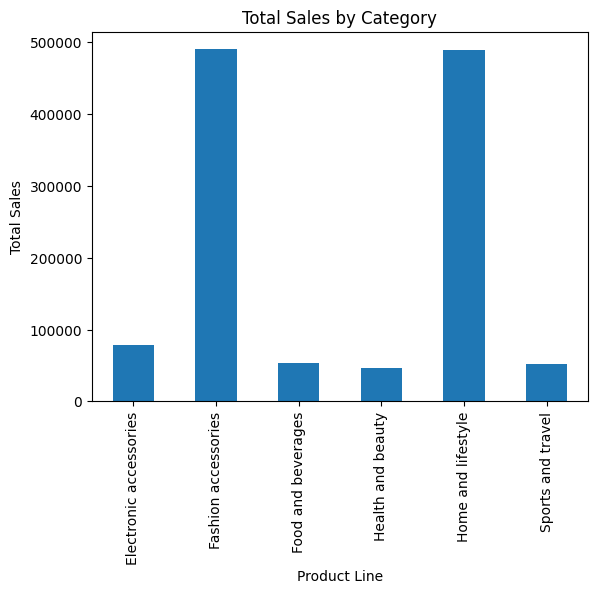

In [25]:
import matplotlib.pyplot as plt

product_sales.plot(kind='bar')
plt.title('Total Sales by Category')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.show()

**Insights:**

Focus on high-revenue categories: Food and beverages, and Fashion accessories are key revenue drivers and should be prioritized for inventory management and marketing efforts.

Investigate underperformance: Research the reasons behind lower sales in Health and beauty. Are there competitive pressures or changing customer preferences?

Boost moderate performers: Electronic accessories have potential, but sales could be improved through targeted promotions or product expansion.

Overall distribution: The bar chart may show a relatively skewed distribution, highlighting the importance of the top-performing categories for overall sales.

In [26]:
df.to_csv('walmart_clean_data.csv', index=False)